https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
casos_confirmado = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
)
mortes = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
)
recuperados = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
)

In [3]:
casos_confirmado.set_index("Country/Region", inplace=True)
mortes.set_index("Country/Region", inplace=True)
recuperados.set_index("Country/Region", inplace=True)
display(casos_confirmado.head())
display(mortes.head())
display(recuperados.head())

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
casos_confirmado_agrupados_por_paises = casos_confirmado.groupby("Country/Region").sum()
mortes_agrupados_por_paises = mortes.groupby("Country/Region").sum()
recuperados_agrupados_por_paises = (
    casos_confirmado.groupby("Country/Region").sum()
    - mortes.groupby("Country/Region").sum()
)

/tmp/ipykernel_10616/794852096.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_confirmado_agrupados_por_paises = casos_confirmado.groupby("Country/Region").sum()
/tmp/ipykernel_10616/794852096.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mortes_agrupados_por_paises = mortes.groupby("Country/Region").sum()
/tmp/ipykernel_10616/794852096.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_confirmado.

In [5]:
casos_confirmados_no_Brasil = casos_confirmado_agrupados_por_paises.loc["Brazil"][
    3:
].to_frame()
casos_fatais_no_Brasil = mortes_agrupados_por_paises.loc["Brazil"][3:].to_frame()

<AxesSubplot:>

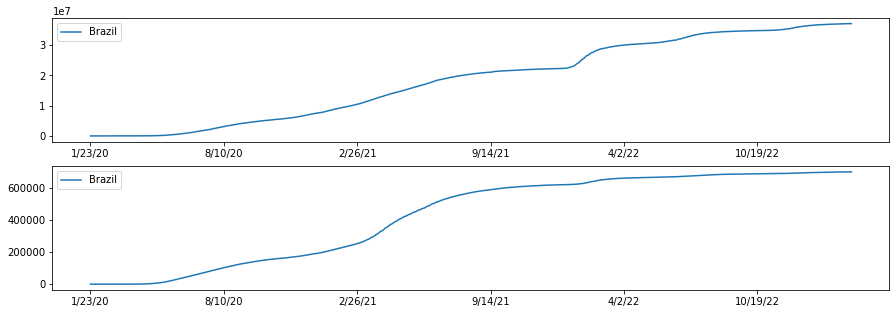

In [6]:
fig, ax = plt.subplots(2, figsize=(15, 5))
casos_confirmados_no_Brasil.plot(ax=ax[0])
casos_fatais_no_Brasil.plot(ax=ax[1])

<AxesSubplot:>

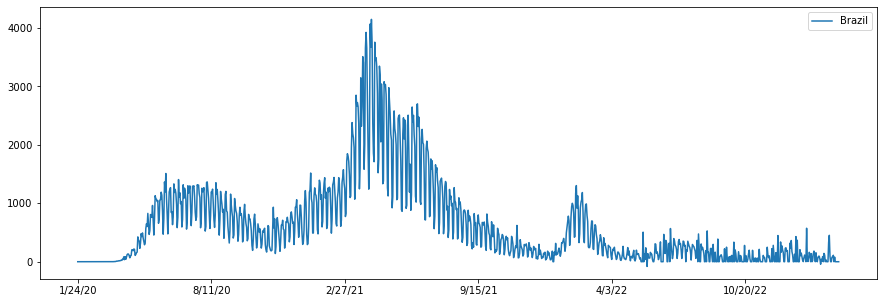

In [7]:
casos_fatais_no_Brasil.diff().dropna().plot(figsize=(15, 5))

In [26]:
resumo_mortes = casos_fatais_no_Brasil.iloc[-1].to_frame()
resumo_mortes.rename(index={"Brazil": "Mortes por Covid"}, inplace=True)

resumo_casos_confirmados = casos_confirmados_no_Brasil.iloc[-1].to_frame()
resumo_casos_confirmados.rename(index={"Brazil": "Casos Confirmados"}, inplace=True)

<AxesSubplot:ylabel='3/9/23'>

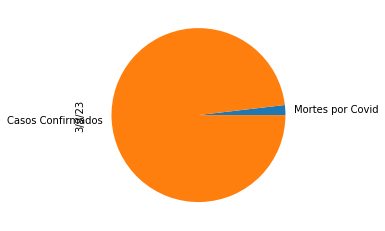

In [34]:
df = pd.concat([resumo_mortes, resumo_casos_confirmados])
df["3/9/23"].plot(kind="pie")